## **Objective  - Apply SVD and display the top 5 movie recommendations for a user along with their estimated scores as part of your output.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/For Collab/Quiz_and_assignments/New for ntflx/combinedNetflixData (1).txt.crdownload', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [4]:
dataset['Rating']=dataset['Rating'].astype(float)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [6]:
dataset.head(6)

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0


In [7]:
dataset.shape

(24058263, 2)

In [9]:
R = dataset.groupby('Rating')['Rating'].agg(['count'])
R

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [10]:
# As we can see in the dataset the movie id is place above the custis and for movie id the rating is Nan
# because it is place ahead of cust id. so to count the movies we can count the nan values in rating column.
movie_count = dataset.isnull().sum()[1]
movie_count

<ipython-input-10-240e1d92b258>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = dataset.isnull().sum()[1]


4499

In [11]:
# Now if we substract the movie count from the unique counts of cust id column we will get the number of customer.
cust_count = dataset['Cust_Id'].nunique() - movie_count
cust_count

470758

In [12]:
# Getting rating counts
rating_count = dataset['Cust_Id'].count() - movie_count
rating_count

24053764

Text(0.5, 0, 'Count')

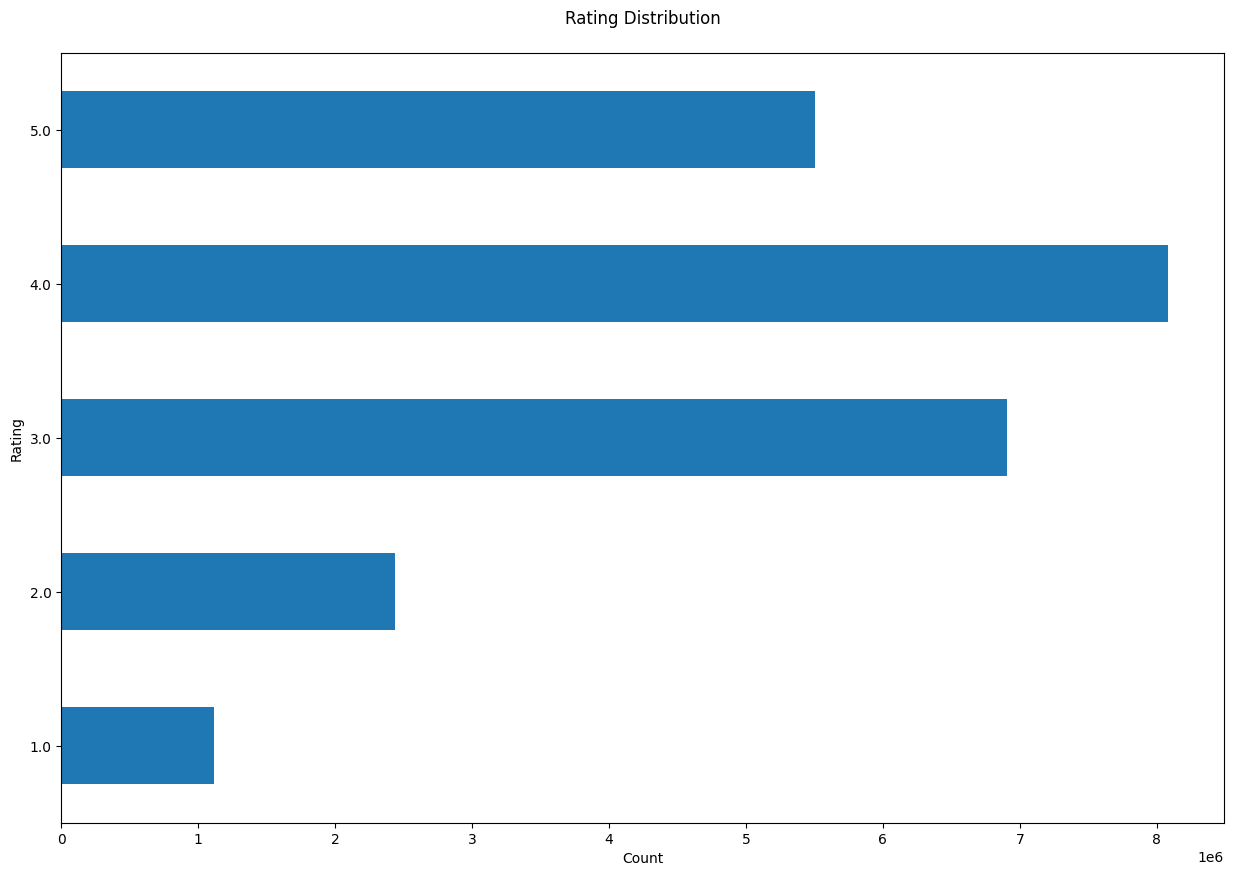

In [13]:
# Plotting the distribution of ratings.
ax = R.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Rating Distribution\n')
plt.ylabel('Rating')
plt.xlabel('Count')

In [14]:
# Creating a numpy array containing movie ids coresponding to the row in the 'rating' dataset.
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [15]:
df_nan = df_nan[df_nan['Rating'] == True]
df_nan.shape

(4499, 1)

In [16]:
df_nan = df_nan.reset_index() # resetting the index of the dataframe.
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [17]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [18]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [19]:
print(len(movie_np))  # Length of the NumPy array
print(len(dataset))        # Number of rows in the DataFrame


24053764
24053764


In [20]:
dataset.shape

(24053764, 3)

In [21]:
f = ['count', 'mean']

In [22]:
# To create a list of movies rated less(only include top 30% rate movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary.index = dataset_movie_summary.index.map(int)
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [23]:
# Create a list of all the inactive users (users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
print('Customer minimum times of review: {}'.format(cust_benchmark))

Customer minimum times of review: 52.0


In [24]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (24053764, 3)


In [25]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (17337458, 3)


In [26]:

print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [29]:
#Create ratings matix for 'ratings' matrix with rows = userid,
#columns = movieid
df_R = pd.pivot_table(dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
print(df_R.shape)

(143458, 1350)


In [30]:
df_R.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#df_title = pd.read_csv('/content/drive/MyDrive/For Collab/Quiz_and_assignments/New for ntflx/NetflixMovieData (1).csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

#df_title.set_index('Movie_Id', inplace = True)

#print (df_title.head(10))

         Year Name
Movie_Id          
NaN       NaN  NaN
NaN       NaN  NaN
NaN       NaN  NaN
NaN       NaN  NaN
NaN       NaN  NaN
NaN       NaN  NaN
NaN       NaN  NaN
NaN       NaN  NaN
NaN       NaN  NaN
NaN       NaN  NaN


In [27]:
df_title.shape

(17769, 2)

In [28]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17769 entries, nan to nan
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    35 non-null     object
 1   Name    9 non-null      object
dtypes: object(2)
memory usage: 416.5+ KB


In [29]:
df_title.isna().sum()

,0
Year,17734
Name,17760


In [30]:
!head /content/drive/MyDrive/For\ Collab/Quiz_and_assignments/New\ for\ ntflx/NetflixMovieData\ \(1\).csv


1,2003,Dinosaur Planet,,,
2,2004,Isle of Man TT 2004 Review,,,
3,1997,Character,,,
4,1994,Paula Abdul's Get Up & Dance,,,
5,2004,The Rise and Fall of ECW,,,
6,1997,Sick,,,
7,1992,8 Man,,,
8,2004,What the #$*! Do We Know!?,,,
9,1991,Class of Nuke 'Em High 2,,,
10,2001,Fighter,,,


In [35]:
df_title = pd.read_csv(
    '/content/drive/MyDrive/For Collab/Quiz_and_assignments/New for ntflx/NetflixMovieData (1).csv',
    encoding="ISO-8859-1",
    usecols=[0, 1, 2],  # Use only the first three columns
    names=['Movie_Id', 'Year', 'Name'],  # Column names
    header=None # No header row in the file

)
df_title.set_index('Movie_Id', inplace=True)


In [37]:
print(df_title.head())


            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW


In [34]:
!pip install scikit-surprise


In [38]:
#Importing the important libraries
import math
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [39]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9959  1.0042  0.9928  0.9977  0.0048  
MAE (testset)     0.7949  0.8027  0.8000  0.7992  0.0033  
Fit time          1.47    1.46    1.51    1.48    0.02    
Test time         0.22    0.25    0.17    0.21    0.03    


{'test_rmse': array([0.99592538, 1.00421011, 0.99283396]),
 'test_mae': array([0.79485817, 0.80270786, 0.80003026]),
 'fit_time': (1.4708497524261475, 1.459951639175415, 1.5098013877868652),
 'test_time': (0.221327543258667, 0.24826741218566895, 0.16938424110412598)}

In [40]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [41]:
# To find the all the movies rated as 5 stars by user with userid= 712664
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

,Name
Movie_Id,
3,Character
79,The Killing
175,Reservoir Dogs
199,The Deer Hunter
241,North by Northwest
256,Ghost Dog: The Way of the Samurai
348,The Last Temptation of Christ
357,House of Sand and Fog
416,Elephant


In [42]:
# Training an SVD to predict ratings for userid=1
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                            Name  Estimate_Score
871   1954.0                   Seven Samurai        5.000000
995   1961.0                         Yojimbo        5.000000
1276  1988.0             Red Dwarf: Series 3        5.000000
721   2003.0              The Wire: Season 1        5.000000
2101  1994.0          The Simpsons: Season 6        5.000000
3289  1974.0                   The Godfather        5.000000
174   1992.0                  Reservoir Dogs        5.000000
4352  2002.0  Curb Your Enthusiasm: Season 3        5.000000
4114  1999.0         The Simpsons: Bart Wars        5.000000
773   2003.0              Foyle's War: Set 2        4.997219


In [43]:
# Create a shallow copy for the movies dataset
user_1_data = df_title.copy()

# Reset index to avoid any issues with row indices
user_1_data = user_1_data.reset_index()

# Remove all the movies rated less often (if needed)
user_1_data = user_1_data[~user_1_data['Movie_Id'].isin(drop_movie_list)]

# Filter the dataset to include only ratings for userId = 1
user_1_ratings = dataset[dataset['Cust_Id'] == 1]

# Create a Dataset object with ratings for user 1
data = Dataset.load_from_df(user_1_ratings[['Cust_Id', 'Movie_Id', 'Rating']], reader)

# Create a training set for SVD
trainset = data.build_full_trainset()

# Initialize and train the SVD model
svd = SVD()
svd.fit(trainset)

# Predict the ratings for all movies for user 1
user_1_data['Estimate_Score'] = user_1_data['Movie_Id'].apply(lambda x: svd.predict(1, x).est)

# Drop the 'Movie_Id' column (since it's no longer needed)
user_1_data = user_1_data.drop('Movie_Id', axis=1)

# Sort the predicted ratings for user 1 in descending order
user_1_data = user_1_data.sort_values('Estimate_Score', ascending=False)

# Print top 10 movie recommendations for user 1
print(user_1_data.head(10))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


         Year                   Name  Estimate_Score
2      1997.0              Character               5
12887  1975.0    Race with the Devil               5
12889  2003.0           24: Season 3               5
12890  1995.0                  Smoke               5
12891  2004.0   Driving Miss Wealthy               5
12892  1960.0       The Time Machine               5
12893  1997.0                Ivanhoe               5
12894  1994.0  Bullets Over Broadway               5
12895  2002.0            Unspeakable               5
12896  1989.0   Fright Night Part II               5
